# List 03

In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=7293fa9c736556070073ac72541275efdf2b0d9327095099c7062b65888fd019
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

from minisom import MiniSom    
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import RegularPolygon
from matplotlib import pyplot as plt
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

## Quest 1 [K-means]

In [12]:
# data
x = [[-5.82,-4.68, 3.36, 7.72, -7.64, -6.87, 4.47, 7.73, -7.71, -5.91, 2.18 ,6.72 ,-5.25,-6.94,7.09,6.81,-4.19,-5.38,5.08,7.27],
      [-4.58, 2.16, -3.19, 0.88, 3.06, 0.57, -2.62, -2.01, 3.34, -0.49, 3.81, -0.93, -0.26, -1.22, 0.20, 3.17, 4.24, -1.74, 3.30, 0.93],
      [-1.97, 3.71, 1.09, 1.80, 3.50, -5.45, 5.76, 5.18, -6.33, -5.68, 5.82, -3.04, 0.56, 1.13, 2.25, -4.15, 4.04, 1.43, 5.33, -2.78]]

In [13]:
# short circuits at shortest nested list if table is jagged
x = np.array(list(map(list, zip(*x))))
x

array([[-5.82, -4.58, -1.97],
       [-4.68,  2.16,  3.71],
       [ 3.36, -3.19,  1.09],
       [ 7.72,  0.88,  1.8 ],
       [-7.64,  3.06,  3.5 ],
       [-6.87,  0.57, -5.45],
       [ 4.47, -2.62,  5.76],
       [ 7.73, -2.01,  5.18],
       [-7.71,  3.34, -6.33],
       [-5.91, -0.49, -5.68],
       [ 2.18,  3.81,  5.82],
       [ 6.72, -0.93, -3.04],
       [-5.25, -0.26,  0.56],
       [-6.94, -1.22,  1.13],
       [ 7.09,  0.2 ,  2.25],
       [ 6.81,  3.17, -4.15],
       [-4.19,  4.24,  4.04],
       [-5.38, -1.74,  1.43],
       [ 5.08,  3.3 ,  5.33],
       [ 7.27,  0.93, -2.78]])

a) 

In [14]:
# k-means
kmeans = KMeans(
         init='random',
         n_clusters=3, 
         n_init=10,
         max_iter=100,
)
kmeans.fit(x)

KMeans(init='random', max_iter=100, n_clusters=3)

In [15]:
centroids = kmeans.cluster_centers_
centroids

array([[-6.5775, -0.29  , -4.8575],
       [-5.68  ,  1.04  ,  2.395 ],
       [ 5.843 ,  0.354 ,  1.726 ]])

In [16]:
identified_clusters = kmeans.labels_
identified_clusters

array([0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2],
      dtype=int32)

In [17]:
# adding column to array using append() method
data_with_clusters = np.append(np.array(x), np.transpose([identified_clusters]), axis=1)

In [18]:
data_with_clusters

array([[-5.82, -4.58, -1.97,  0.  ],
       [-4.68,  2.16,  3.71,  1.  ],
       [ 3.36, -3.19,  1.09,  2.  ],
       [ 7.72,  0.88,  1.8 ,  2.  ],
       [-7.64,  3.06,  3.5 ,  1.  ],
       [-6.87,  0.57, -5.45,  0.  ],
       [ 4.47, -2.62,  5.76,  2.  ],
       [ 7.73, -2.01,  5.18,  2.  ],
       [-7.71,  3.34, -6.33,  0.  ],
       [-5.91, -0.49, -5.68,  0.  ],
       [ 2.18,  3.81,  5.82,  2.  ],
       [ 6.72, -0.93, -3.04,  2.  ],
       [-5.25, -0.26,  0.56,  1.  ],
       [-6.94, -1.22,  1.13,  1.  ],
       [ 7.09,  0.2 ,  2.25,  2.  ],
       [ 6.81,  3.17, -4.15,  2.  ],
       [-4.19,  4.24,  4.04,  1.  ],
       [-5.38, -1.74,  1.43,  1.  ],
       [ 5.08,  3.3 ,  5.33,  2.  ],
       [ 7.27,  0.93, -2.78,  2.  ]])

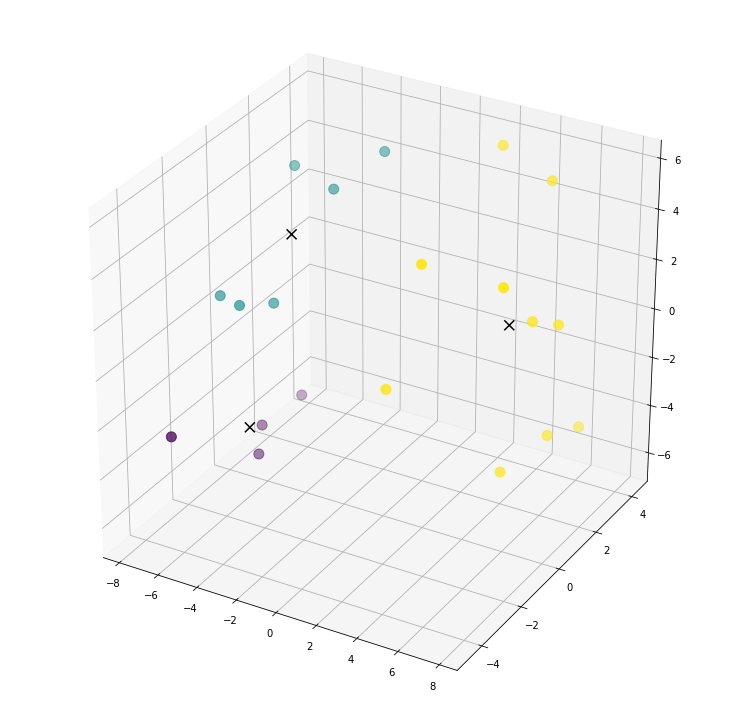

In [19]:
# creating figure
fig = plt.figure(figsize = (13, 13))
ax = plt.axes(projection ="3d")
 
# creating plot
ax.scatter(data_with_clusters[:, 0], data_with_clusters[:, 1], data_with_clusters[:, 2], c=data_with_clusters[:, 3], s=100)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c="black", s=100, label="Centers", alpha=1, marker='x')

# show plot
plt.show()

b) 

In [20]:
# centers
m1 = np.zeros(3)
m2 = np.array([1,1,1])
m3 = np.array([-1,0,2])

In [21]:
center = np.array(np.transpose([m1, m2, m3]))
center

array([[ 0.,  1., -1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  2.]])

In [22]:
#kmeans
kmeans = KMeans(
         init=center,
         n_clusters=3, 
         max_iter=100,
)
kmeans.fit(x)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[ 0.,  1., -1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  2.]]),
       max_iter=100, n_clusters=3)

In [23]:
centroids = kmeans.cluster_centers_
centroids

array([[-6.83      ,  1.14      , -5.82      ],
       [-5.7       ,  0.23714286,  1.77142857],
       [ 5.843     ,  0.354     ,  1.726     ]])

In [24]:
identified_clusters = kmeans.labels_
identified_clusters

array([1, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2],
      dtype=int32)

In [25]:
# adding column to array using append() method
data_with_clusters = np.append(np.array(x), np.transpose([identified_clusters]), axis=1)
data_with_clusters

array([[-5.82, -4.58, -1.97,  1.  ],
       [-4.68,  2.16,  3.71,  1.  ],
       [ 3.36, -3.19,  1.09,  2.  ],
       [ 7.72,  0.88,  1.8 ,  2.  ],
       [-7.64,  3.06,  3.5 ,  1.  ],
       [-6.87,  0.57, -5.45,  0.  ],
       [ 4.47, -2.62,  5.76,  2.  ],
       [ 7.73, -2.01,  5.18,  2.  ],
       [-7.71,  3.34, -6.33,  0.  ],
       [-5.91, -0.49, -5.68,  0.  ],
       [ 2.18,  3.81,  5.82,  2.  ],
       [ 6.72, -0.93, -3.04,  2.  ],
       [-5.25, -0.26,  0.56,  1.  ],
       [-6.94, -1.22,  1.13,  1.  ],
       [ 7.09,  0.2 ,  2.25,  2.  ],
       [ 6.81,  3.17, -4.15,  2.  ],
       [-4.19,  4.24,  4.04,  1.  ],
       [-5.38, -1.74,  1.43,  1.  ],
       [ 5.08,  3.3 ,  5.33,  2.  ],
       [ 7.27,  0.93, -2.78,  2.  ]])

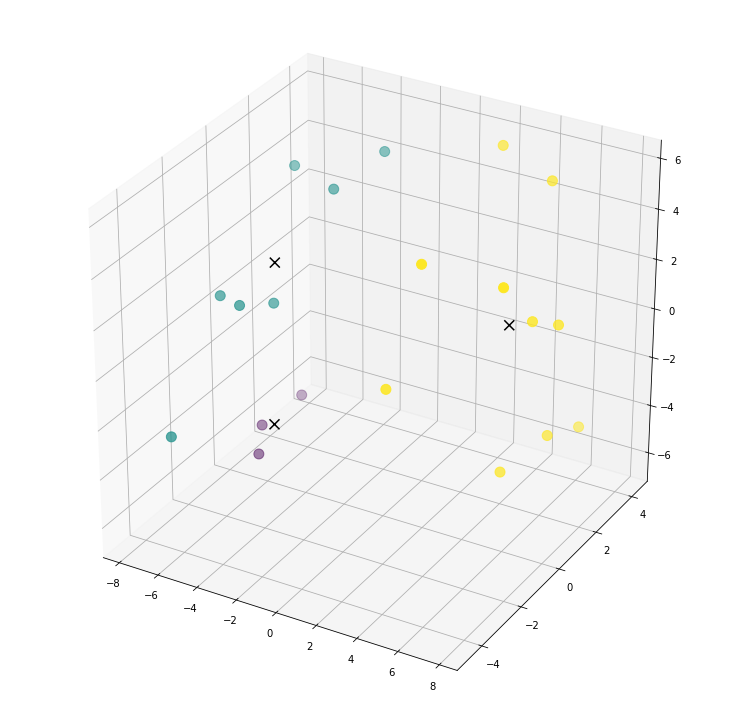

In [26]:
# creating figure
fig = plt.figure(figsize = (13, 13))
ax = plt.axes(projection ="3d")
 
# creating plot
ax.scatter(data_with_clusters[:, 0], data_with_clusters[:, 1], data_with_clusters[:, 2], c=data_with_clusters[:, 3], s = 100)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c="black", s=100, label="Centers", alpha=1, marker='x')

# show plot
plt.show()

## Quest 2 [SOM]

In [ ]:
data = { 'Países': ['Reino Unido', 'Austrália', 'Canadá', 'Estados Unidos', 'Japão', 'França', 'Cingapura', 'Argentina', 'Uruguai', 'Cuba', 'Colômbia', 'Brasil', 'Paraguai', 'Egito', 'Nigéria', 'Senegal', 'Serra Leoa', 'Angola', 'Etiópia', 'Moçambique', 'China'],
              'Expectativa de vida': [0.88, 0.90, 0.90, 0.87, 0.93, 0.89, 0.88, 0.81, 0.82, 0.85, 0.77, 0.71, 0.75, 0.70, 0.44, 0.47, 0.23, 0.34, 0.31, 0.24, 0.76],
              'Educação': [0.99, 0.99, 0.98, 0.98, 0.93, 0.97, 0.87, 0.92, 0.92, 0.90, 0.85, 0.83, 0.83, 0.62, 0.58, 0.37, 0.33, 0.36, 0.35, 0.37, 0.80],
              'PIB': [0.91, 0.93, 0.94, 0.97, 0.93, 0.92, 0.91, 0.80, 0.75, 0.64, 0.69, 0.72, 0.63, 0.60, 0.37, 0.45, 0.27, 0.51, 0.32, 0.36, 0.61],
              'Estabilidade política': [1.10, 1.26, 1.24, 1.18, 1.20, 1.04, 1.41, 0.55, 1.05, 0.07, 1.36, 0.47, 0.87, 0.21, 1.36, 0.68, 1.26, 1.98, 0.55, 0.20, 0.39],
            }

In [ ]:
data = pd.DataFrame(data)
data

,Países,Expectativa de vida,Educação,PIB,Estabilidade política
0,Reino Unido,0.88,0.99,0.91,1.10
1,Austrália,0.90,0.99,0.93,1.26
2,Canadá,0.90,0.98,0.94,1.24
3,Estados Unidos,0.87,0.98,0.97,1.18
4,Japão,0.93,0.93,0.93,1.20
5,França,0.89,0.97,0.92,1.04
6,Cingapura,0.88,0.87,0.91,1.41
7,Argentina,0.81,0.92,0.80,0.55
8,Uruguai,0.82,0.92,0.75,1.05
9,Cuba,0.85,0.90,0.64,0.07


In [ ]:
average = ['Média', 0.69, 0.75, 0.68, 0.16]
dev = ['Desvio Padrão', 0.24, 0.249, 0.229, 1.056]

In [ ]:
data.iloc[:, 1:]

,Expectativa de vida,Educação,PIB,Estabilidade política
0,0.88,0.99,0.91,1.10
1,0.90,0.99,0.93,1.26
2,0.90,0.98,0.94,1.24
3,0.87,0.98,0.97,1.18
4,0.93,0.93,0.93,1.20
5,0.89,0.97,0.92,1.04
6,0.88,0.87,0.91,1.41
7,0.81,0.92,0.80,0.55
8,0.82,0.92,0.75,1.05
9,0.85,0.90,0.64,0.07


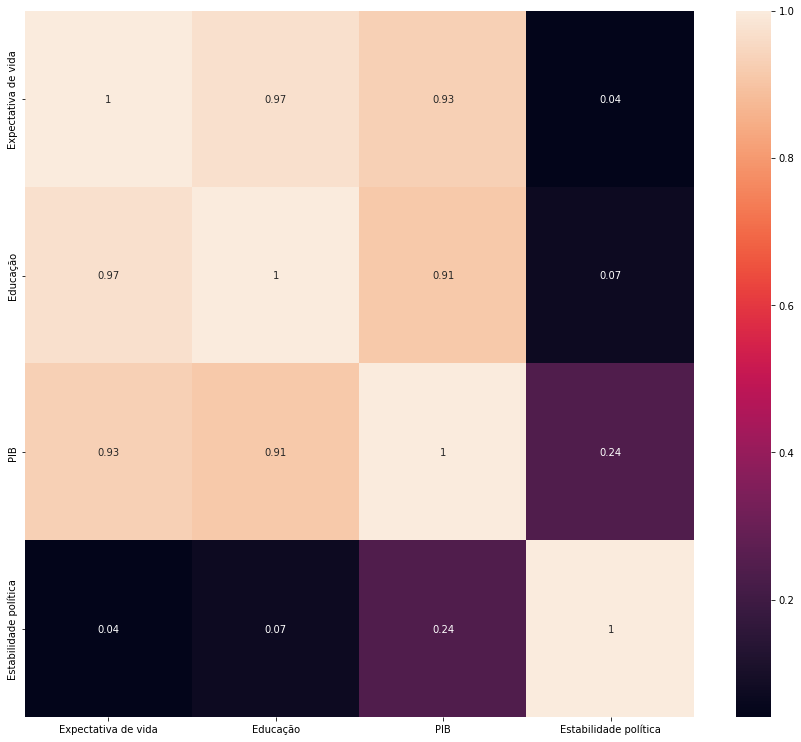

In [ ]:
plt.figure(figsize = (15,13))
feat_num = len(data.iloc[:, 1:].columns)

corrMatrix = data.corr().round(2)
sns.heatmap(corrMatrix, annot=True)
    
plt.show()

In [ ]:
data.iloc[:, 1:].values

array([[0.88, 0.99, 0.91, 1.1 ],
       [0.9 , 0.99, 0.93, 1.26],
       [0.9 , 0.98, 0.94, 1.24],
       [0.87, 0.98, 0.97, 1.18],
       [0.93, 0.93, 0.93, 1.2 ],
       [0.89, 0.97, 0.92, 1.04],
       [0.88, 0.87, 0.91, 1.41],
       [0.81, 0.92, 0.8 , 0.55],
       [0.82, 0.92, 0.75, 1.05],
       [0.85, 0.9 , 0.64, 0.07],
       [0.77, 0.85, 0.69, 1.36],
       [0.71, 0.83, 0.72, 0.47],
       [0.75, 0.83, 0.63, 0.87],
       [0.7 , 0.62, 0.6 , 0.21],
       [0.44, 0.58, 0.37, 1.36],
       [0.47, 0.37, 0.45, 0.68],
       [0.23, 0.33, 0.27, 1.26],
       [0.34, 0.36, 0.51, 1.98],
       [0.31, 0.35, 0.32, 0.55],
       [0.24, 0.37, 0.36, 0.2 ],
       [0.76, 0.8 , 0.61, 0.39]])

In [ ]:
data.iloc[:, 1:].shape

(21, 4)

In [ ]:
# parameters
x = 25
y = 25
input_len = data.iloc[:, 1:].shape[1]
sigma = 1
learning_rate = 0.5
iterations = 500000

In [ ]:
# initialization of 25x25 SOM
# trains the SOM with 500000 iterations
som = MiniSom(x, y, input_len, sigma, learning_rate) 
som.train(data.iloc[:, 1:].values, iterations) 

In [ ]:
# the position of the winning neuron on the map for a given sample
som.winner(data.iloc[:, 1:].values[0])

(19, 6)

In [ ]:
data_values = data.iloc[:, 1:].values
data_values

array([[0.88, 0.99, 0.91, 1.1 ],
       [0.9 , 0.99, 0.93, 1.26],
       [0.9 , 0.98, 0.94, 1.24],
       [0.87, 0.98, 0.97, 1.18],
       [0.93, 0.93, 0.93, 1.2 ],
       [0.89, 0.97, 0.92, 1.04],
       [0.88, 0.87, 0.91, 1.41],
       [0.81, 0.92, 0.8 , 0.55],
       [0.82, 0.92, 0.75, 1.05],
       [0.85, 0.9 , 0.64, 0.07],
       [0.77, 0.85, 0.69, 1.36],
       [0.71, 0.83, 0.72, 0.47],
       [0.75, 0.83, 0.63, 0.87],
       [0.7 , 0.62, 0.6 , 0.21],
       [0.44, 0.58, 0.37, 1.36],
       [0.47, 0.37, 0.45, 0.68],
       [0.23, 0.33, 0.27, 1.26],
       [0.34, 0.36, 0.51, 1.98],
       [0.31, 0.35, 0.32, 0.55],
       [0.24, 0.37, 0.36, 0.2 ],
       [0.76, 0.8 , 0.61, 0.39]])

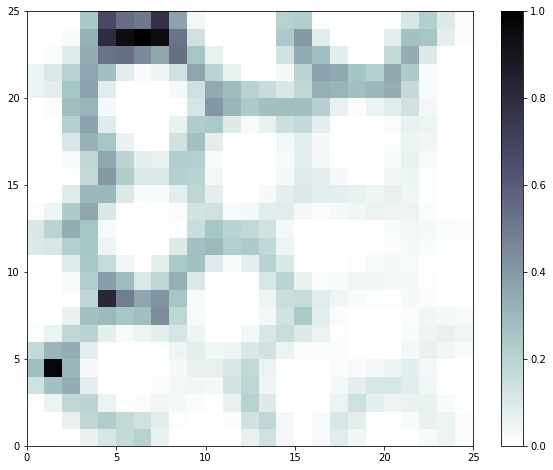

In [ ]:
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.show()

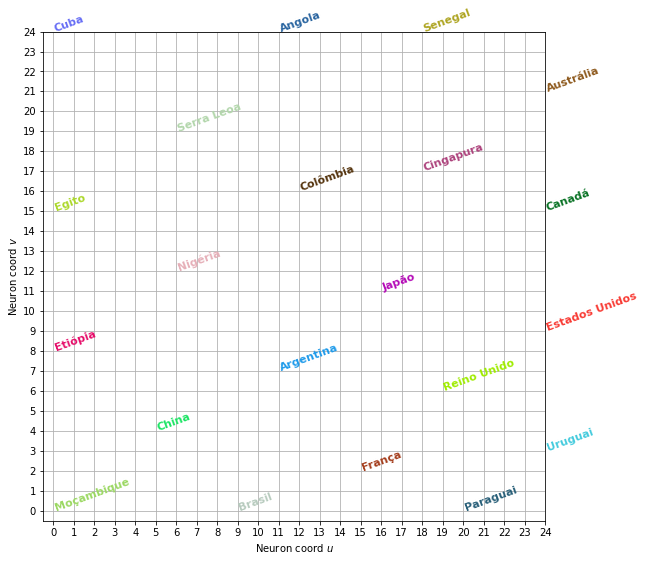

In [ ]:
plt.figure(figsize=(9,9))
wmap = {}
im = 0

for x, t in zip(data.iloc[:, 1:].values, data['Países'].values):
  w = som.winner(x)
  wmap[w] = im
  plt.text(
      w[0], w[1], str(t),
      rotation=20,
      c=np.random.rand(3,),
      fontdict={'weight': 'bold', 'size': 11}
  )
  im = im+1

plt.axis([-0.5, 9.5, -0.5, 9.5])
plt.xlabel('Neuron coord $u$')
plt.ylabel('Neuron coord $v$')

plt.xticks(range(25))
plt.yticks(range(25))
plt.grid()

plt.show()

## Question 3 [Four gaussian distributions - SOM]

In [ ]:
# data
m1 = np.zeros(8)
m2 = np.array([4,0,0,0,0,0,0,0])
m3 = np.array([0,0,0,4,0,0,0,0])
m4 = np.array([0,0,0,0,0,0,0,4])

In [ ]:
# center
centers = np.array([m1, m2, m3, m4])
centers

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4.]])

In [ ]:
data, y = make_blobs(n_samples=1000, centers=centers, n_features=8)

In [ ]:
np.set_printoptions(precision=3)
print('Amostra do conjunto de dados\n\n', data[:5])

Amostra do conjunto de dados

 [[-1.191  0.912  0.021  1.898  0.017 -1.627  0.61   0.603]
 [-1.41  -0.54   0.776  1.973 -1.174 -0.131  0.045  0.402]
 [ 0.96  -0.533 -0.147  1.831 -1.828  0.671 -0.055 -0.384]
 [ 0.273 -1.39   0.453  5.599  0.254  0.316  0.657  0.649]
 [ 0.111 -0.176 -0.513  0.975 -1.694 -1.637 -0.683  3.3  ]]


In [ ]:
som = MiniSom(
    10, 10, 8, 
    sigma=1.5, learning_rate=.7,
    activation_distance='euclidean', 
    topology='hexagonal', 
    neighborhood_function='gaussian'
)

som.train(data, 100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 2.2298987095667013


In [ ]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

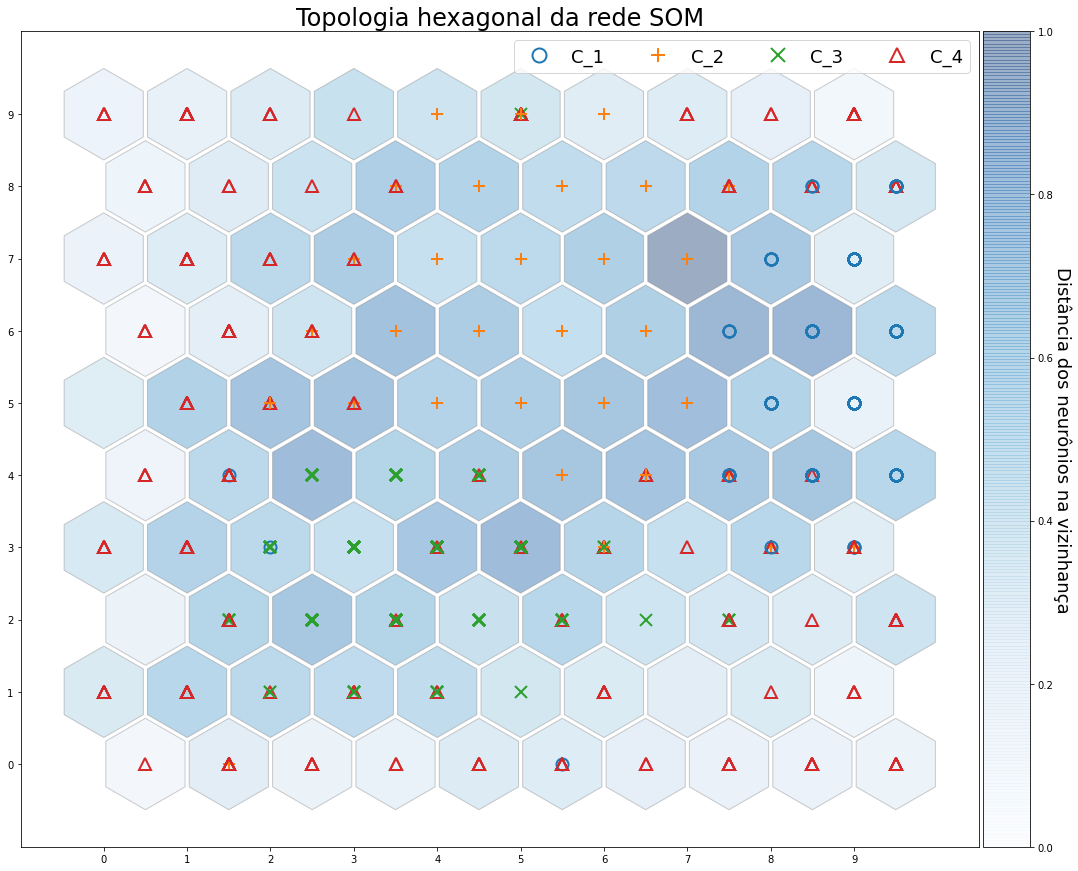

In [ ]:
f = plt.figure(figsize=(22, 15))
ax = f.add_subplot(111)

ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon(
            (xx[(i, j)], wy), 
            numVertices=6, 
            radius=.95 / np.sqrt(3),
            facecolor=cm.Blues(umatrix[i, j]), 
            alpha=.4, 
            edgecolor='gray'
        )
        ax.add_patch(hex)

markers = ['o', '+', 'x', '^']
colors = ['C0', 'C1', 'C2', 'C3']
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * 2 / np.sqrt(3) * 3 / 4
    plt.plot(
        wx, wy, 
        markers[y[cnt]-1], 
        markerfacecolor='None',
        markeredgecolor=colors[y[cnt]-1], 
        markersize=12, 
        markeredgewidth=2
    )

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 18
cb1.ax.set_ylabel('Distância dos neurônios na vizinhança', rotation=270, fontsize=18)
plt.gcf().add_axes(ax_cb)

legend_elements = [
    Line2D([0], [0], marker='o', color='C0', label='C_1', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='+', color='C1', label='C_2', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='x', color='C2', label='C_3',markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='^', color='C3', label='C_4',markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)
]

ax.set_title('Topologia hexagonal da rede SOM', fontsize=24)
ax.legend(handles=legend_elements, loc='upper right', ncol=4, fontsize=18)

#plt.tight_layout()
plt.show()

## Question 4 [Deep Reinforcement Learning]


### **Projeto Malmo**: _usando Minecraft para construir tecnologias mais inteligentes_
<p align='center'>
  <img src='https://drive.google.com/uc?id=14F2dg1ZgqsaiJE82tOKJ7LC457NQMxYn'>
</p>

Sobre o projeto: https://www.microsoft.com/en-us/research/project/project-malmo/

Repositório: https://github.com/Microsoft/malmo#getting-started

Pesquisadores da Microsoft veem o jogo Minecraft como uma ambiente ideal para realizar testes para pesquisa avançada de inteligência artificial, uma vez que ele conta com um ambiente com infinitas possibilidades, permitindo com que o agente aprenda inúmeras tarefas que em um mundo real não poderiam ser testadas, como:

- Ensiná-lo a escalar uma colina real
- Aprender a se locomover por conta própria sem cair de uma colina ou em um poço de lava
- Construir coisas, como uma mesa
- Navegar por labirintos
> A plataforma Minecraft foi especialmente atraente porque permite aos jogadores tomar decisões realmente complexas que têm consequências e adicionar elementos cada vez mais difíceis à medida que melhoram. Ele também permite que os usuários trabalhem juntos, o que pode ajudar os pesquisadores a experimentar como humanos e agentes artificialmente inteligentes podem trabalhar juntos.

## Question 5 [Expert Systems]

### **Project**: *flu or cold?*

<p align='center'>
  <img src='https://drive.google.com/uc?id=1KkkgOFWeBzWft4gWFfCe4u1nqg1fPzvN' height='300'>
</p>

Source: https://github.com/ZarahShibli/Cold-or-Flu/blob/master/ColdOrFlu.py

In [ ]:
!pip install experta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for frozendict: filename=frozendict-1.2-py3-none-any.whl size=3165 sha256=ead8559c0eb24fb3f9c0ef1123e9c16db7af1a7fe5a34b5f23644b2f8c31b37c
  Stored in directory: /root/.cache/pip/wheels/9b/9b/56/5713233cf7226423ab6c58c08081551a301b5863e343ba053c
Successfully built frozendict


In [ ]:
from random import choice
from experta import *

#This system has capable of diagnosing respiratory illnesses and 
# decide if someone is having a cold or flu. 
# The system requests the user to enter the symptoms as input and 
# the system diagnosis accurately even if the user entered any 
# synonyms of the symptoms. Then it checks if the symptom is flu 
# symptom or cold symptom to determine which counter that need to 
# increase flu or cold counter, it does the same step with all symptoms.
# Also, if the user enters less than 3 symptoms, it asked to enter more 
# symptoms to diagnose their state. Finally, it compares between flu and 
# cold counter to print the diagnosis result.  

In [ ]:
class FluOrCold(KnowledgeEngine):


    @DefFacts()
    def symptoms(self):
        yield Fact(action="flu_or_cold")

    #################
    #Cold Symptoms
    #Fever
    @Rule(Fact(action='flu_or_cold'),
          OR(Fact(symptom="no fever"),
             Fact(symptom="mild fever"),
             Fact(symptom="no temperature"),
             Fact(symptom="mild temperature"),
             Fact(symptom="no hyperthermia"),
             Fact(symptom="mild hyperthermia"),
             Fact(symptom="no pyrexia"),
             Fact(symptom="mild pyrexia")))
    def fever_cold(self):
       global cold_symptoms
       cold_symptoms +=1

    #Coughing
    @Rule(Fact(action='flu_or_cold'),
          OR(Fact(symptom="producing cough"),
             Fact(symptom="mucus cough")))
    def coughing_cold(self):
       global cold_symptoms
       cold_symptoms +=1

    #Nasal discharge
    @Rule(Fact(action='flu_or_cold'),
          OR(Fact(symptom="stuffy nose"),
             Fact(symptom="runny nose")))
    def nasal_discharge_cold(self):
       global cold_symptoms
       cold_symptoms +=1

    #Tiredness
    @Rule(Fact(action='flu_or_cold'),
          OR(Fact(symptom="mild tiredness"),
             Fact(symptom="mild fatigue"),
             Fact(symptom="mild exhaustion")))
    def tiredness_cold(self):
       global cold_symptoms
       cold_symptoms +=1

    #Headache
    @Rule(Fact(action='flu_or_cold'),
          OR(Fact(symptom="headache"),
           Fact(symptom="mild headache"),
           Fact(symptom="mild migraine"),
           Fact(symptom="mild head pain")), salience=0)
    def headache_cold(self):
       global cold_symptoms
       cold_symptoms +=1

    #Dizziness
    @Rule(Fact(action='flu_or_cold'),
         OR(Fact(symptom="no lightheadedness"),
            Fact(symptom="no syncope"),
            Fact(symptom="no fainting"),
            Fact(symptom="no dizziness")))
    def dizziness_flu(self):
       global cold_symptoms
       cold_symptoms +=1

    #Nausea
    @Rule(Fact(action='flu_or_cold'),
         OR(Fact(symptom="no nausea"),
            Fact(symptom="no vomiting"),
            Fact(symptom="no stomach upset"),
            Fact(symptom="no sickness"),
            Fact(symptom="no low appetite")))
    def nausea_cold(self):
       global cold_symptoms
       cold_symptoms +=1     


    #################
    #Flu Symptoms
    #Fever
    @Rule(Fact(action='flu_or_cold'),
         OR(Fact(symptom="high fever"),
            Fact(symptom="moderate fever"),
            Fact(symptom="high temperature"),
            Fact(symptom="moderate temperature"),
            Fact(symptom="high hyperthermia"),
            Fact(symptom="moderate hyperthermia"),
            Fact(symptom="high pyrexia"),
            Fact(symptom="moderate pyrexia")))
    def fever_flu(self):
       global flu_symptoms
       flu_symptoms +=1


    #Coughing
    @Rule(Fact(action='flu_or_cold'),
         Fact(symptom="dry cough"))
    def coughing_flu(self):
       global flu_symptoms
       flu_symptoms +=1


    #Nasal discharge
    @Rule(Fact(action='flu_or_cold'),
          Fact(symptom="runny nose"))
    def nasal_discharge_flu(self):
       global flu_symptoms
       flu_symptoms +=1

    #Tiredness
    @Rule(Fact(action='flu_or_cold'),
          OR(Fact(symptom="moderate tiredness"),
             Fact(symptom="severe tiredness"),
             Fact(symptom="moderate fatigue"),
             Fact(symptom="severe fatigue"),
             Fact(symptom="moderate exhaustion"),
             Fact(symptom="severe exhaustion")))
    def tiredness_flu(self):
       global flu_symptoms
       flu_symptoms +=1

    #Headache
    @Rule(Fact(action='flu_or_cold'),
        OR(Fact(symptom="headache"),
           Fact(symptom="moderate headache"),
           Fact(symptom="severe headache"),
           Fact(symptom="moderate migraine"),
           Fact(symptom="severe migraine"),
           Fact(symptom="moderate head pain"),
           Fact(symptom="severe head pain")), salience=1)
    def headache_flu(self):
       global flu_symptoms
       flu_symptoms +=1

    #Dizziness
    @Rule(Fact(action='flu_or_cold'),
         OR(Fact(symptom="lightheadedness"),
            Fact(symptom="syncope"),
            Fact(symptom="fainting"),
            Fact(symptom="dizziness")))
    def dizziness_flu(self):
       global flu_symptoms
       flu_symptoms +=1

    #Nausea
    @Rule(Fact(action='flu_or_cold'),
         OR(Fact(symptom="nausea"),
            Fact(symptom="vomiting"),
            Fact(symptom="stomach upset"),
            Fact(symptom="sickness"),
            Fact(symptom="low appetite")))
    def nausea_cold(self):
       global flu_symptoms
       flu_symptoms +=1

    #################
    #Common Symptoms
    #Sneezing
    @Rule(Fact(action='flu_or_cold'),
         Fact(symptom="sneezing"))
    def sneezing_cold_flu(self):
       global cold_symptoms
       cold_symptoms +=1
       global flu_symptoms
       flu_symptoms +=1


    #Sore Throat
    @Rule(Fact(action='flu_or_cold'),
         OR(Fact(symptom="pain throat"),
            Fact(symptom="throat sore"),
            Fact(symptom="sore throat")))
    def sore_throat_cold_flu(self):
       global cold_symptoms
       cold_symptoms +=1
       global flu_symptoms
       flu_symptoms +=1

In [ ]:
#Output
flu_symptoms =0
cold_symptoms =0
print("")
print(" Cold or Flu ".center(40, "*"))
print(" Note ".center(40, "*"))
print (" Enter one symptom in line ".center(40, "*"))
print ("Enter (I do not have) to show your state ".center(40, "*"))
print(" ")
engine = FluOrCold()

while(1):
    print("What is your symptoms?")
    symptom = input()
    #Exit from loop if the input equal " i do not have"
    if symptom.strip().lower() == "i do not have":
      break
    engine.reset()  # Prepare the engine for the execution.
    engine.declare(Fact(symptom=symptom.strip().lower()))
    engine.run()  # Run it


#Check if user enter less than 3 symptoms      
if ((flu_symptoms < 3) and (cold_symptoms < 3)):
    print("You must enter at least 3 symptoms")
#Cann't diagnose user state when the flu and cold symptoms are equal 
elif((flu_symptoms == cold_symptoms)):
    print("Cann't diagnose your state")
#If the flu counter greater than cold counter, then the user has flu
elif ((flu_symptoms > 3) and (flu_symptoms > cold_symptoms)):
    print ("You have flu")
#If the cold counter greater than flu counter, then the user has cold
elif ((cold_symptoms > 3) and (flu_symptoms < cold_symptoms)):
    print ("You have cold")


************* Cold or Flu **************
***************** Note *****************
****** Enter one symptom in line *******
Enter (I do not have) to show your state 
 
What is your symptoms?
sneezing
What is your symptoms?
pain throat
What is your symptoms?
severe headache
What is your symptoms?
no vomiting
What is your symptoms?
high temperature
What is your symptoms?
i do not have
You have flu


## Question 6 [Fuzzy-logic inverted pendulum]

<p align='center'>
  <img src='https://drive.google.com/uc?id=1MUCV0S73hOirf5BxJfwOt2N9lYNlIk8l' height='300'>
</p>

Artigo: [Controlador Nebuloso Aplicado ao Equilíbrio de um Pêndulo](http://ojs.unirg.edu.br/index.php/1/article/view/3703/1925)

**Objetivo:**  manter um pêndulo invertido sobre o carro na posição vertical

**Regras:** 35

<p align='center'>
  <img src='https://drive.google.com/uc?id=1l3VpDPxZS20_cL6yrmSDfICxA_memzMx' width=800>
</p>

- Positivo  Muito  Grande(PMG)
- PositivoGrande(PG)
- Positivo(P)
- Zero(Z)
- Negativo(N)
- Negativo Grande(NG)
- Negativo Muito Grande(NMG)

**Entradas**: os itens que estão na _vertical_ representam o ângulo do pêndulo e os que estão na _horizontal_ representam a velocidade angular.

> "Fazendo uma interseção entre as variáveis de entrada é possível obter os valores da força, como por exemplo, na primeira regra a interseção entre o ângulo do pêndulo PMG e a velocidade angular PG ocorre a ativação da força PMMG. No entanto, por se tratarem de conjuntos nebulosos, é necessário lembrar que há um grau de pertinência associado além de múltiplas sobreposições, não permitindo uma definição única e imediata, apenas utilizando a tabela da base de regras."

**Conclusões**:
- Obteve-se sucesso
- Valores menores de comprimento até o centro são mais
fáceis de controlar

## Question 7 [Tree search methods]

### Pesquisa de Árvore de Monte Carlo (*Monte Carlo Tree Search* - MCTS) em **Jogo da Velha**
Source: https://gist.github.com/qpwo/c538c6f73727e254fdc7fab81024f6e1

Funcionamento com o Jogo da Velha: https://vgarciasc.github.io/mcts-viz/

Passos:
- Seleção: percorre a árvore utilizando a fórmula _Upper Confidence Bound_ (UCT), de forma que o algoritmo seleciona o nó com a maior possibilidade de vencer
- Expansão: nó filho é adicionado
- Simulação: simulação até que o objetivo seja alcançado
- Backpropagation: pontuações dos nós pais atualizadas

In [ ]:
"""
A minimal implementation of Monte Carlo tree search (MCTS) in Python 3
Luke Harold Miles, July 2019, Public Domain Dedication
See also https://en.wikipedia.org/wiki/Monte_Carlo_tree_search
https://gist.github.com/qpwo/c538c6f73727e254fdc7fab81024f6e1
"""
from abc import ABC, abstractmethod
from collections import defaultdict
import math


class MCTS:
    "Monte Carlo tree searcher. First rollout the tree then choose a move."

    def __init__(self, exploration_weight=1):
        self.Q = defaultdict(int)  # total reward of each node
        self.N = defaultdict(int)  # total visit count for each node
        self.children = dict()  # children of each node
        self.exploration_weight = exploration_weight

    def choose(self, node):
        "Choose the best successor of node. (Choose a move in the game)"
        if node.is_terminal():
            raise RuntimeError(f"choose called on terminal node {node}")

        if node not in self.children:
            return node.find_random_child()

        def score(n):
            if self.N[n] == 0:
                return float("-inf")  # avoid unseen moves
            return self.Q[n] / self.N[n]  # average reward

        return max(self.children[node], key=score)

    def do_rollout(self, node):
        "Make the tree one layer better. (Train for one iteration.)"
        path = self._select(node)
        leaf = path[-1]
        self._expand(leaf)
        reward = self._simulate(leaf)
        self._backpropagate(path, reward)

    def _select(self, node):
        "Find an unexplored descendent of `node`"
        path = []
        while True:
            path.append(node)
            if node not in self.children or not self.children[node]:
                # node is either unexplored or terminal
                return path
            unexplored = self.children[node] - self.children.keys()
            if unexplored:
                n = unexplored.pop()
                path.append(n)
                return path
            node = self._uct_select(node)  # descend a layer deeper

    def _expand(self, node):
        "Update the `children` dict with the children of `node`"
        if node in self.children:
            return  # already expanded
        self.children[node] = node.find_children()

    def _simulate(self, node):
        "Returns the reward for a random simulation (to completion) of `node`"
        invert_reward = True
        while True:
            if node.is_terminal():
                reward = node.reward()
                return 1 - reward if invert_reward else reward
            node = node.find_random_child()
            invert_reward = not invert_reward

    def _backpropagate(self, path, reward):
        "Send the reward back up to the ancestors of the leaf"
        for node in reversed(path):
            self.N[node] += 1
            self.Q[node] += reward
            reward = 1 - reward  # 1 for me is 0 for my enemy, and vice versa

    def _uct_select(self, node):
        "Select a child of node, balancing exploration & exploitation"

        # All children of node should already be expanded:
        assert all(n in self.children for n in self.children[node])

        log_N_vertex = math.log(self.N[node])

        def uct(n):
            "Upper confidence bound for trees"
            return self.Q[n] / self.N[n] + self.exploration_weight * math.sqrt(
                log_N_vertex / self.N[n]
            )

        return max(self.children[node], key=uct)


class Node(ABC):
    """
    A representation of a single board state.
    MCTS works by constructing a tree of these Nodes.
    Could be e.g. a chess or checkers board state.
    """

    @abstractmethod
    def find_children(self):
        "All possible successors of this board state"
        return set()

    @abstractmethod
    def find_random_child(self):
        "Random successor of this board state (for more efficient simulation)"
        return None

    @abstractmethod
    def is_terminal(self):
        "Returns True if the node has no children"
        return True

    @abstractmethod
    def reward(self):
        "Assumes `self` is terminal node. 1=win, 0=loss, .5=tie, etc"
        return 0

    @abstractmethod
    def __hash__(self):
        "Nodes must be hashable"
        return 123456789

    @abstractmethod
    def __eq__(node1, node2):
        "Nodes must be comparable"
        return True
"""
An example implementation of the abstract Node class for use in MCTS
If you run this file then you can play against the computer.
A tic-tac-toe board is represented as a tuple of 9 values, each either None,
True, or False, respectively meaning 'empty', 'X', and 'O'.
The board is indexed by row:
0 1 2
3 4 5
6 7 8
For example, this game board
O - X
O X -
X - -
corrresponds to this tuple:
(False, None, True, False, True, None, True, None, None)
"""

from collections import namedtuple
from random import choice
#from monte_carlo_tree_search import MCTS, Node

_TTTB = namedtuple("TicTacToeBoard", "tup turn winner terminal")

# Inheriting from a namedtuple is convenient because it makes the class
# immutable and predefines __init__, __repr__, __hash__, __eq__, and others
class TicTacToeBoard(_TTTB, Node):
    def find_children(board):
        if board.terminal:  # If the game is finished then no moves can be made
            return set()
        # Otherwise, you can make a move in each of the empty spots
        return {
            board.make_move(i) for i, value in enumerate(board.tup) if value is None
        }

    def find_random_child(board):
        if board.terminal:
            return None  # If the game is finished then no moves can be made
        empty_spots = [i for i, value in enumerate(board.tup) if value is None]
        return board.make_move(choice(empty_spots))

    def reward(board):
        if not board.terminal:
            raise RuntimeError(f"reward called on nonterminal board {board}")
        if board.winner is board.turn:
            # It's your turn and you've already won. Should be impossible.
            raise RuntimeError(f"reward called on unreachable board {board}")
        if board.turn is (not board.winner):
            return 0  # Your opponent has just won. Bad.
        if board.winner is None:
            return 0.5  # Board is a tie
        # The winner is neither True, False, nor None
        raise RuntimeError(f"board has unknown winner type {board.winner}")

    def is_terminal(board):
        return board.terminal

    def make_move(board, index):
        tup = board.tup[:index] + (board.turn,) + board.tup[index + 1 :]
        turn = not board.turn
        winner = _find_winner(tup)
        is_terminal = (winner is not None) or not any(v is None for v in tup)
        return TicTacToeBoard(tup, turn, winner, is_terminal)

    def to_pretty_string(board):
        to_char = lambda v: ("X" if v is True else ("O" if v is False else " "))
        rows = [
            [to_char(board.tup[3 * row + col]) for col in range(3)] for row in range(3)
        ]
        return (
            "\n  1 2 3\n"
            + "\n".join(str(i + 1) + " " + " ".join(row) for i, row in enumerate(rows))
            + "\n"
        )


def play_game():
    tree = MCTS()
    board = new_tic_tac_toe_board()
    print(board.to_pretty_string())
    while True:
        row_col = input("enter row,col: ")
        row, col = map(int, row_col.split(","))
        index = 3 * (row - 1) + (col - 1)
        if board.tup[index] is not None:
            raise RuntimeError("Invalid move")
        board = board.make_move(index)
        print(board.to_pretty_string())
        if board.terminal:
            break
        # You can train as you go, or only at the beginning.
        # Here, we train as we go, doing fifty rollouts each turn.
        for _ in range(50):
            tree.do_rollout(board)
        board = tree.choose(board)
        print(board.to_pretty_string())
        if board.terminal:
            break


def _winning_combos():
    for start in range(0, 9, 3):  # three in a row
        yield (start, start + 1, start + 2)
    for start in range(3):  # three in a column
        yield (start, start + 3, start + 6)
    yield (0, 4, 8)  # down-right diagonal
    yield (2, 4, 6)  # down-left diagonal


def _find_winner(tup):
    "Returns None if no winner, True if X wins, False if O wins"
    for i1, i2, i3 in _winning_combos():
        v1, v2, v3 = tup[i1], tup[i2], tup[i3]
        if False is v1 is v2 is v3:
            return False
        if True is v1 is v2 is v3:
            return True
    return None


def new_tic_tac_toe_board():
    return TicTacToeBoard(tup=(None,) * 9, turn=True, winner=None, terminal=False)


if __name__ == "__main__":
    play_game()


  1 2 3
1      
2      
3      

enter row,col: 2,2

  1 2 3
1      
2   X  
3      


  1 2 3
1      
2 O X  
3      

enter row,col: 1,1

  1 2 3
1 X    
2 O X  
3      


  1 2 3
1 X   O
2 O X  
3      

enter row,col: 3,3

  1 2 3
1 X   O
2 O X  
3     X



## Question 8 [Genetic Algorithms]

Source: https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python

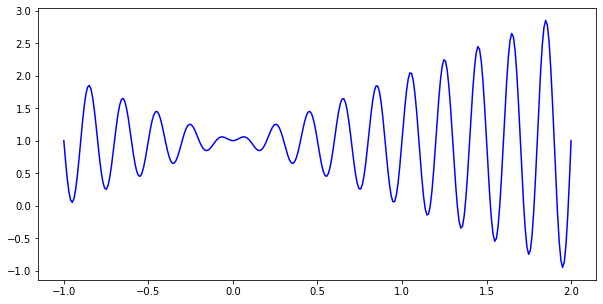

In [ ]:
# function from -1 to 2
def f(x):
   return x * np.sin(np.pi * x*10) + 1

x = np.linspace(-1,2,300)

plt.figure(figsize=(10, 5))
plt.plot(x, f(x), color='blue')

In [11]:
# Parameter initialization 
genes = 2
chromosomes = 10
mattingPoolSize = 6
offspringSize = chromosomes - mattingPoolSize
lb = -1
ub = 2
populationSize = (chromosomes, genes)
generations = 3

#Population initialization
population = np.random.uniform(lb, ub, populationSize)

for generation in range(generations):
    print(("Generation:", generation+1))
    fitness = population*np.sin(10*np.pi*population) + 1
    print("\npopulation")
    print(population)
    print("\nfitness calcuation")
    print(fitness)
    # Following statement will create an empty two dimensional array to store parents
    parents = np.empty((mattingPoolSize, population.shape[1]))

    # A loop to extract one parent in each iteration
    for p in range(mattingPoolSize):
        # Finding index of fittest chromosome in the population
        fittestIndex = np.where(fitness == np.max(fitness))
        # Extracting index of fittest chromosome
        fittestIndex = fittestIndex[0][0]
        # Copying fittest chromosome into parents array
        parents[p, :] = population[fittestIndex, :]
        # Changing fitness of fittest chromosome to avoid reselection of that chromosome 
        fitness[fittestIndex] = -1
    print("\nParents:")
    print(parents)

    # Following statement will create an empty two dimensional array to store offspring
    offspring = np.empty((offspringSize, population.shape[1]))
    for k in range(offspringSize):
         #Determining the crossover point
         crossoverPoint = np.random.randint(0,genes) 

         # Index of the first parent.
         parent1Index = k%parents.shape[0]

         # Index of the second.
         parent2Index = (k+1)%parents.shape[0]

         # Extracting first half of the offspring
         offspring[k, 0: crossoverPoint] = parents[parent1Index, 0: crossoverPoint]

         # Extracting second half of the offspring
         offspring[k, crossoverPoint:] = parents[parent2Index, crossoverPoint:]
    print("\nOffspring after crossover:")
    print(offspring)

    # Implementation of random initialization mutation. 
    for index in range(offspring.shape[0]):
        randomIndex = np.random.randint(1,genes)
        randomValue = np.random.uniform(lb, ub, 1)
        offspring [index, randomIndex] = offspring [index, randomIndex] + randomValue
    print("\n Offspring after Mutation")
    print(offspring)

    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring
    print("\nNew Population for next generation:")
    print(population)

fitness = population*np.sin(10*np.pi*population) + 1
fittestIndex = np.where(fitness == np.max(fitness))
# Extracting index of fittest chromosome
fittestIndex = fittestIndex[0][0]
# Getting Best chromosome
fittestInd = population[fittestIndex, :]
bestFitness = fitness[fittestIndex]
print("\nBest Individual:")
print(fittestInd)
print("\nBest Individual's Fitness:")
print(bestFitness)

('Generation:', 1)

population
[[ 1.2629431   0.18064108]
 [-0.26168303  1.39029345]
 [ 0.160516   -0.18719094]
 [ 0.28767907 -0.33365254]
 [-0.69649471  0.93917906]
 [ 0.6203549   1.33661507]
 [ 0.18654586  1.19732429]
 [ 0.47984658  0.29228453]
 [-0.27905673  0.16655247]
 [ 1.9996243   1.07204146]]

fitness calcuation
[[ 2.15996664  0.89678648]
 [ 1.24425392  0.58258367]
 [ 0.84816432  0.92668939]
 [ 1.10859305  0.70939002]
 [ 1.07654446  0.11456884]
 [ 1.37020837 -0.22017576]
 [ 0.92347873  0.89947165]
 [ 1.28391452  1.07015472]
 [ 1.17064259  0.85546349]
 [ 0.97639913  1.82513129]]

Parents:
[[ 1.2629431   0.18064108]
 [ 1.9996243   1.07204146]
 [ 0.6203549   1.33661507]
 [ 0.47984658  0.29228453]
 [-0.26168303  1.39029345]
 [-0.27905673  0.16655247]]

Offspring after crossover:
[[ 1.9996243   1.07204146]
 [ 1.9996243   1.33661507]
 [ 0.47984658  0.29228453]
 [-0.26168303  1.39029345]]

 Offspring after Mutation
[[ 1.9996243   0.53343841]
 [ 1.9996243   2.56411705]
 [ 0.47984658  1